# Chapter 2 MNIST Follow Through

In [1]:
# imports
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

c:\users\danie\pycharmprojects\tensorflowtest\venv\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\users\danie\pycharmprojects\tensorflowtest\venv\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
c:\users\danie\pycharmprojects\tensorflowtest\venv\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
# import data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
# analyze data
print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


# Starting Training

In [4]:
# define model
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

# compile the model
model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [5]:
# format test data
train_norm_image = np.resize(train_images, (train_images.shape[0],28*28)).astype("float32") / 255.0
test_norm_image = np.resize(test_images, (test_images.shape[0], 28*28)).astype("float32") / 255.0

In [6]:
# train model
model.fit(train_norm_image, train_labels, batch_size=128, epochs=5)

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 0.2562 - accuracy: 0.9262

In [10]:
# test model
model.evaluate(test_norm_image, test_labels)

313/313 [==============================] - 0s 824us/step - loss: 0.0804 - accuracy: 0.9752


[0.08036661893129349, 0.9751999974250793]

7 7


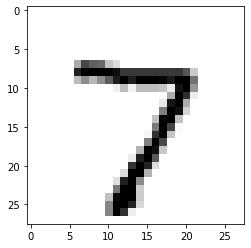

2 2


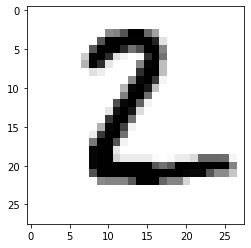

In [8]:
for i in range(test_images.shape[0]):
    if input() == "exit":
        break
    else:
        print(test_labels[i], model.predict(test_norm_image[i:i+1]).argmax())
        plt.imshow(test_images[i], cmap=plt.cm.binary)
        plt.show()
